In [2]:
pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing dataset


In [5]:
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:03<00:00, 196MB/s]
100% 812M/812M [00:04<00:00, 209MB/s]


In [8]:
!ls -l

total 831632
-rw-r--r-- 1 root root 851576689 Dec 11  2019 dogs-vs-cats.zip
-rw-r--r-- 1 root root        69 Jul 19 14:44 kaggle.json
drwxr-xr-x 1 root root      4096 Jul 17 13:31 sample_data


In [9]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
from zipfile import ZipFile

dataset_train = '/content/train.zip'

with ZipFile(dataset_train, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [12]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.12165.jpg', 'dog.8794.jpg', 'cat.1413.jpg', 'dog.11234.jpg', 'cat.6978.jpg', 'dog.2287.jpg', 'dog.3703.jpg', 'cat.10671.jpg', 'dog.10677.jpg', 'cat.2096.jpg', 'dog.11149.jpg', 'dog.1405.jpg', 'cat.5671.jpg', 'dog.12173.jpg', 'dog.10101.jpg', 'dog.6926.jpg', 'cat.6327.jpg', 'dog.11302.jpg', 'cat.6136.jpg', 'cat.10587.jpg', 'cat.1296.jpg', 'cat.8467.jpg', 'dog.4361.jpg', 'dog.1201.jpg', 'dog.7797.jpg', 'cat.8680.jpg', 'cat.10200.jpg', 'dog.3563.jpg', 'dog.3231.jpg', 'dog.6325.jpg', 'dog.6774.jpg', 'cat.4362.jpg', 'cat.3627.jpg', 'dog.11397.jpg', 'dog.2305.jpg', 'dog.2523.jpg', 'dog.11203.jpg', 'dog.1537.jpg', 'dog.3714.jpg', 'cat.11952.jpg', 'cat.10633.jpg', 'cat.7688.jpg', 'dog.1727.jpg', 'cat.12123.jpg', 'cat.10133.jpg', 'dog.2949.jpg', 'cat.10974.jpg', 'cat.190.jpg', 'cat.10561.jpg', 'cat.2092.jpg', 'dog.10410.jpg', 'dog.7148.jpg', 'dog.4074.jpg', 'dog.5174.jpg', 'cat.7577.jpg', 'dog.4985.jpg', 'dog.10113.jpg', 'cat.5802.jpg', 'cat.2259.jpg', 'dog.3487.jpg', 'cat.2754.jpg', 'cat

In [20]:
#regular
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#image processing
import matplotlib.image as mpimg
from PIL import Image
from google.colab.patches import cv2_imshow
import cv2
import glob
#sklearn
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder #preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso #linear models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #decision tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
#check accuracy
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report
#tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential # model
from tensorflow.keras.layers import Dense # type of layer
from tensorflow.keras.activations import linear, relu, sigmoid,softmax #activation function
from tensorflow.keras import regularizers

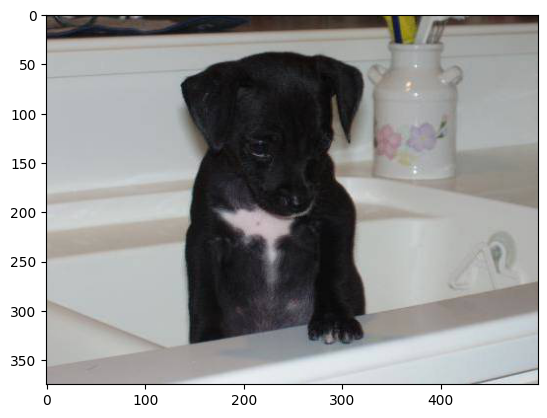

In [14]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

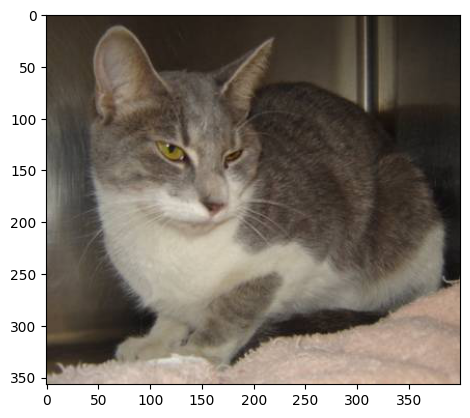

In [15]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [16]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [17]:
os.mkdir('/content/image resized')

In [18]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  img_path = original_folder+file_names[i]

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+file_names[i]
  img.save(newImgPath)

In [19]:
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [21]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [22]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [23]:
X = dog_cat_images
Y = np.asarray(labels)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

scaleing data, because y is 1 or 0. thus x should also be in the range of 0 and 1.

In [25]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

pre trained model

In [26]:
import tensorflow_hub as hub

In [27]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [28]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [29]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [30]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 45s 841ms/step - loss: 0.2782 - acc: 0.8712
Epoch 2/5
50/50 [==============================] - 36s 717ms/step - loss: 0.0751 - acc: 0.9719
Epoch 3/5
50/50 [==============================] - 36s 715ms/step - loss: 0.0594 - acc: 0.9794
Epoch 4/5
50/50 [==============================] - 35s 702ms/step - loss: 0.0424 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 35s 700ms/step - loss: 0.0350 - acc: 0.9931


In [31]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 9s 622ms/step - loss: 0.1007 - acc: 0.9675
Test Loss = 0.10072724521160126
Test Accuracy = 0.9674999713897705


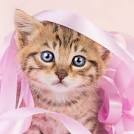

1/1 [==============================] - 0s 36ms/step
[[ 6.1610827 -4.637056 ]]
0
The image represents a Cat


In [37]:
input_image_path ='/content/pink_pussy.jpg' # input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')